In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import fpmax
from mlxtend.frequent_patterns import association_rules
from matplotlib.pyplot import figure

## Загрузка данных

In [3]:
all_data = pd.read_csv('groceries - groceries.csv')
print(all_data)

      Item(s)               Item 1               Item 2            Item 3  \
0           4         citrus fruit  semi-finished bread         margarine   
1           3       tropical fruit               yogurt            coffee   
2           1           whole milk                  NaN               NaN   
3           4            pip fruit               yogurt      cream cheese   
4           4     other vegetables           whole milk    condensed milk   
...       ...                  ...                  ...               ...   
9830       17              sausage              chicken              beef   
9831        1    cooking chocolate                  NaN               NaN   
9832       10              chicken         citrus fruit  other vegetables   
9833        4  semi-finished bread        bottled water              soda   
9834        5              chicken       tropical fruit  other vegetables   

                        Item 4         Item 5          Item 6  \
0         

Удаляем все Nan

In [4]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

In [5]:
unique_items = set()

for row in np_data:
    for elem in row:
        unique_items.add(elem)

print('Количество уникальных товаров: ', len(unique_items), '\n')        
print(unique_items)

Количество уникальных товаров:  169 

{'flour', 'pork', 'grapes', 'preservation products', 'make up remover', 'specialty bar', 'misc. beverages', 'fish', 'salad dressing', 'white wine', 'dessert', 'candy', 'dish cleaner', 'hygiene articles', 'brandy', 'berries', 'canned beer', 'meat', 'rum', 'cream cheese', 'nut snack', 'chocolate', 'ready soups', 'organic products', 'cereals', 'cookware', 'whisky', 'soda', 'mayonnaise', 'specialty vegetables', 'seasonal products', 'dental care', 'chewing gum', 'hard cheese', 'herbs', 'sparkling wine', 'abrasive cleaner', 'dishes', 'photo/film', 'female sanitary products', 'liquor', 'bags', 'soap', 'frozen fish', 'liquor (appetizer)', 'syrup', 'frozen chicken', 'sweet spreads', 'mustard', 'dog food', 'oil', 'rice', 'salty snack', 'tea', 'other vegetables', 'nuts/prunes', 'napkins', 'semi-finished bread', 'onions', 'cling film/bags', 'specialty fat', 'whipped/sour cream', 'ice cream', 'candles', 'flower (seeds)', 'frozen meals', 'meat spreads', 'soups',

## FPGrowth и FPMax

In [6]:
te = TransactionEncoder()
te_array = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_array, columns = te.columns_)
data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### FPGrowth

In [7]:
result = fpgrowth(data, min_support = 0.03, use_colnames = True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

,support,itemsets,length
0,0.082766,(citrus fruit),1
1,0.058566,(margarine),1
2,0.139502,(yogurt),1
3,0.104931,(tropical fruit),1
4,0.058058,(coffee),1
...,...,...,...
58,0.033249,"(whole milk, pastry)",2
59,0.047382,"(root vegetables, other vegetables)",2
60,0.048907,"(root vegetables, whole milk)",2
61,0.030605,"(rolls/buns, sausage)",2


Определите минимальное и максимальное значения для уровня поддержки для набора из 1,2, и.т.д. объектов.

In [8]:
for leng in range(1, result['length'].max() + 1):
    print ('length', leng, ':')
    print ('min :', result[result['length'] == leng]['support'].min())
    print ('max :', result[result['length'] == leng]['support'].max())
    print ('\n')

length 1 :
min : 0.03040162684290798
max : 0.25551601423487547


length 2 :
min : 0.030096593797661414
max : 0.07483477376715811




### FPMax

In [9]:
result = fpmax(data, min_support=0.03, use_colnames = True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

,support,itemsets,length
0,0.030402,(specialty chocolate),1
1,0.031012,(onions),1
2,0.032944,(hygiene articles),1
3,0.033249,(berries),1
4,0.033249,(hamburger meat),1
5,0.033452,(UHT-milk),1
6,0.033859,(sugar),1
7,0.037112,(dessert),1
8,0.037417,(long life bakery product),1
9,0.037824,(salty snack),1


In [10]:
for leng in range(1, result['length'].max() + 1):
    print ('length', leng, ':')
    print ('min :', result[result['length'] == leng]['support'].min())
    print ('max :', result[result['length'] == leng]['support'].max())
    print ('\n')

length 1 :
min : 0.03040162684290798
max : 0.09852567361464158


length 2 :
min : 0.030096593797661414
max : 0.07483477376715811




Сравнение результатов работы алгоритмов:
    FPMax в результате своей работы возвращает максимальные множества, те не существует множест большего размера, в которые они 
    входят.

Построим гистограмму для 10 самых встречаемых товаров

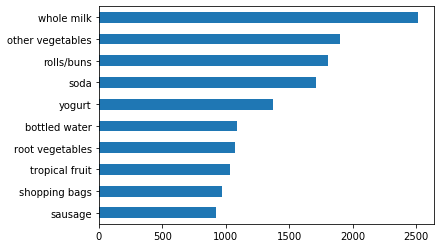

In [11]:
largest = data.sum().nlargest(10)
largest.sort_values().plot.barh()

In [12]:
items = ['whole milk', 'yogurt', 'soda', 'tropical fruit', 'shopping bags','sausage',
'whipped/sour cream', 'rolls/buns', 'other vegetables', 'root vegetables',
'pork', 'bottled water', 'pastry', 'citrus fruit', 'canned beer','bottled beer']

np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str) and elem in
items] for row in np_data]

In [13]:
te = TransactionEncoder()
te_array = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_array, columns = te.columns_)
data

,bottled beer,bottled water,canned beer,citrus fruit,other vegetables,pastry,pork,rolls/buns,root vegetables,sausage,shopping bags,soda,tropical fruit,whipped/sour cream,whole milk,yogurt
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,True,False,False,False,False,True,True,False,False,False,True,True,False
9831,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True
9833,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [14]:
result = fpgrowth(data, min_support = 0.03, use_colnames = True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

,support,itemsets,length
0,0.082766,(citrus fruit),1
1,0.139502,(yogurt),1
2,0.104931,(tropical fruit),1
3,0.255516,(whole milk),1
4,0.193493,(other vegetables),1
5,0.183935,(rolls/buns),1
6,0.080529,(bottled beer),1
7,0.110524,(bottled water),1
8,0.174377,(soda),1
9,0.088968,(pastry),1


In [15]:
result = fpmax(data, min_support = 0.03, use_colnames = True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

,support,itemsets,length
0,0.057651,(pork),1
1,0.032232,"(whole milk, whipped/sour cream)",2
2,0.077682,(canned beer),1
3,0.080529,(bottled beer),1
4,0.030503,"(whole milk, citrus fruit)",2
5,0.033249,"(whole milk, pastry)",2
6,0.030605,"(rolls/buns, sausage)",2
7,0.098526,(shopping bags),1
8,0.035892,"(tropical fruit, other vegetables)",2
9,0.042298,"(tropical fruit, whole milk)",2


In [16]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)
data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


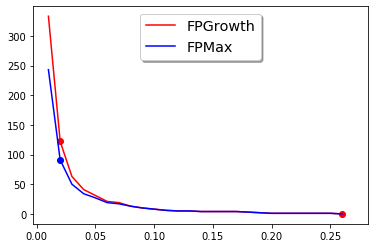

In [25]:
supports = np.arange(0.01, 1, 0.01)
point_growth = pd.Series(dtype='float64') 
border_growth = pd.Series(dtype='float64') 
k_growth = None

point_fpmax = pd.Series(dtype='float64') 
border_fpmax = pd.Series(dtype='float64') 
k_fpmax = None


for support in supports:
    result_fpmax = fpmax(data, min_support = support, use_colnames = True)
    point_fpmax[support] = len(result_fpmax)
    
    result_growth = fpgrowth(data, min_support = support, use_colnames = True)
    point_growth[support] = len(result_growth)
    
    length_fpmax = result_fpmax['itemsets'].apply(lambda x: len(x))
    length_growth = result_growth['itemsets'].apply(lambda x: len(x))
    
    if k_growth is None:
        k_growth = length_growth.max()
    else:
        while k_growth > 0 and len(length_growth[length_growth == k_growth] == 0):
            border_growth[support] = len(result_growth)
            k_growth -= 1
            
    if k_fpmax is None:
        k_fpmax = length_fpmax.max()
    else:
        while k_fpmax > 0 and len(length_fpmax[length_fpmax == k_fpmax] == 0):
            border_fpmax[support] = len(result_fpmax)
            k_fpmax -= 1
    
    if point_growth[support] == 0:
        border_growth[support] = len(result_growth)
        break
        
    if point_fpmax[support] == 0:
        border_fpmax[support] = len(result_fpmax)
        break
            
plt.scatter(border_growth.index, border_growth, c = 'r')
plt.plot(point_growth.index, point_growth, c = 'r', label = 'FPGrowth')
plt.scatter(border_fpmax.index, border_fpmax, c = 'b')
plt.plot(point_fpmax.index, point_fpmax, c = 'b', label = 'FPMax')
legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()

## Ассоциативные правила

In [26]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str) and elem in items] for row in np_data]
np_data = [row for row in np_data if len(row) > 1]

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)


,bottled beer,bottled water,canned beer,citrus fruit,other vegetables,pastry,pork,rolls/buns,root vegetables,sausage,shopping bags,soda,tropical fruit,whipped/sour cream,whole milk,yogurt
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
4,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False
4962,False,False,False,True,False,False,False,False,True,True,False,False,False,True,True,False
4963,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True
4964,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [27]:
result = fpgrowth(data, min_support=0.05, use_colnames = True)
result

,support,itemsets
0,0.241240,(yogurt)
1,0.185864,(tropical fruit)
2,0.421869,(whole milk)
3,0.335079,(other vegetables)
4,0.296214,(rolls/buns)
5,0.113371,(bottled beer)
6,0.185461,(bottled water)
7,0.146395,(citrus fruit)
8,0.267217,(soda)
9,0.196335,(root vegetables)


In [42]:
rules_res = association_rules(result,min_threshold = 0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
1,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797
2,(root vegetables),(other vegetables),0.196335,0.335079,0.093838,0.477949,1.426378,0.028050,1.273671
3,(other vegetables),(root vegetables),0.335079,0.196335,0.093838,0.280048,1.426378,0.028050,1.116276
4,(root vegetables),(whole milk),0.196335,0.421869,0.096859,0.493333,1.169400,0.014031,1.141049
5,(whole milk),(root vegetables),0.421869,0.196335,0.096859,0.229594,1.169400,0.014031,1.043171
6,(rolls/buns),(sausage),0.296214,0.167539,0.060612,0.204623,1.221342,0.010985,1.046624
7,(sausage),(rolls/buns),0.167539,0.296214,0.060612,0.361779,1.221342,0.010985,1.102730
8,(whole milk),(whipped/sour cream),0.421869,0.124245,0.063834,0.151313,1.217858,0.011419,1.031894
9,(whipped/sour cream),(whole milk),0.124245,0.421869,0.063834,0.513776,1.217858,0.011419,1.189023


Значение колонок:
    1. antecedents - антецедент (причина)
    2. consequetns - консеквент (вывод)
    3. antecedent support - поддержка антецедента
    4. consequetns support - поддержка консеквента
    5. support - поддержка отношения [0,1]
    6. confidence - вероятность увидеть консеквент при условиии, что так же содержится антецедент (отношение поддержки отношения и поддержки антецедента) [0,1]
    7. lift - отношение поддержки отношения и поддержки консеквента[0, inf]
    8. leverage - разница между поддержкой отношения и поддержки антецедента и консеквента, если бы они были независимыми [-1,1]
    9. conviction - отношение обратной поддержки консеквента (1 - консеквент) и обратной поддержки отношения. [0, inf]
    
    Расчет производился на основании метрики: по умолчанию confidence

In [34]:
rules = association_rules(result, metric = 'lift', min_threshold = 1.15)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
1,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797
2,(bottled water),(soda),0.185461,0.267217,0.057390,0.309446,1.158033,0.007832,1.061153
3,(soda),(bottled water),0.267217,0.185461,0.057390,0.214770,1.158033,0.007832,1.037325
4,(other vegetables),(citrus fruit),0.335079,0.146395,0.057189,0.170673,1.165836,0.008135,1.029274
5,(citrus fruit),(other vegetables),0.146395,0.335079,0.057189,0.390646,1.165836,0.008135,1.091192
6,(root vegetables),(other vegetables),0.196335,0.335079,0.093838,0.477949,1.426378,0.028050,1.273671
7,(other vegetables),(root vegetables),0.335079,0.196335,0.093838,0.280048,1.426378,0.028050,1.116276
8,(root vegetables),(whole milk),0.196335,0.421869,0.096859,0.493333,1.169400,0.014031,1.141049
9,(whole milk),(root vegetables),0.421869,0.196335,0.096859,0.229594,1.169400,0.014031,1.043171


Смысл: насколько часто можно встретить правило во всех наборах, где имеется консеквент 

In [41]:
rules = association_rules(result, metric = 'leverage', min_threshold = 0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
1,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797
2,(root vegetables),(other vegetables),0.196335,0.335079,0.093838,0.477949,1.426378,0.028050,1.273671
3,(other vegetables),(root vegetables),0.335079,0.196335,0.093838,0.280048,1.426378,0.028050,1.116276
4,(root vegetables),(whole milk),0.196335,0.421869,0.096859,0.493333,1.169400,0.014031,1.141049
5,(whole milk),(root vegetables),0.421869,0.196335,0.096859,0.229594,1.169400,0.014031,1.043171
6,(rolls/buns),(sausage),0.296214,0.167539,0.060612,0.204623,1.221342,0.010985,1.046624
7,(sausage),(rolls/buns),0.167539,0.296214,0.060612,0.361779,1.221342,0.010985,1.102730
8,(whole milk),(whipped/sour cream),0.421869,0.124245,0.063834,0.151313,1.217858,0.011419,1.031894
9,(whipped/sour cream),(whole milk),0.124245,0.421869,0.063834,0.513776,1.217858,0.011419,1.189023


Cмысл: разница между транзакциями, где антецедент и консеквент присутсвуют вместе, и транзакцмиями где они независимы

In [44]:
rules_res.iloc[:,2:].describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.202567,0.368445,0.080608,0.401486,1.102829,0.005754,1.060662
std,0.073939,0.059815,0.029413,0.062088,0.157823,0.009841,0.098881
min,0.124245,0.241240,0.053363,0.309446,0.837619,-0.012801,0.894062
25%,0.163311,0.335079,0.058901,0.355662,1.021735,0.001391,1.014848
50%,0.185663,0.378474,0.066955,0.386548,1.079290,0.007340,1.056824
75%,0.207561,0.421869,0.094593,0.453011,1.181515,0.011093,1.102770
max,0.421869,0.421869,0.148208,0.513776,1.426378,0.028050,1.273671


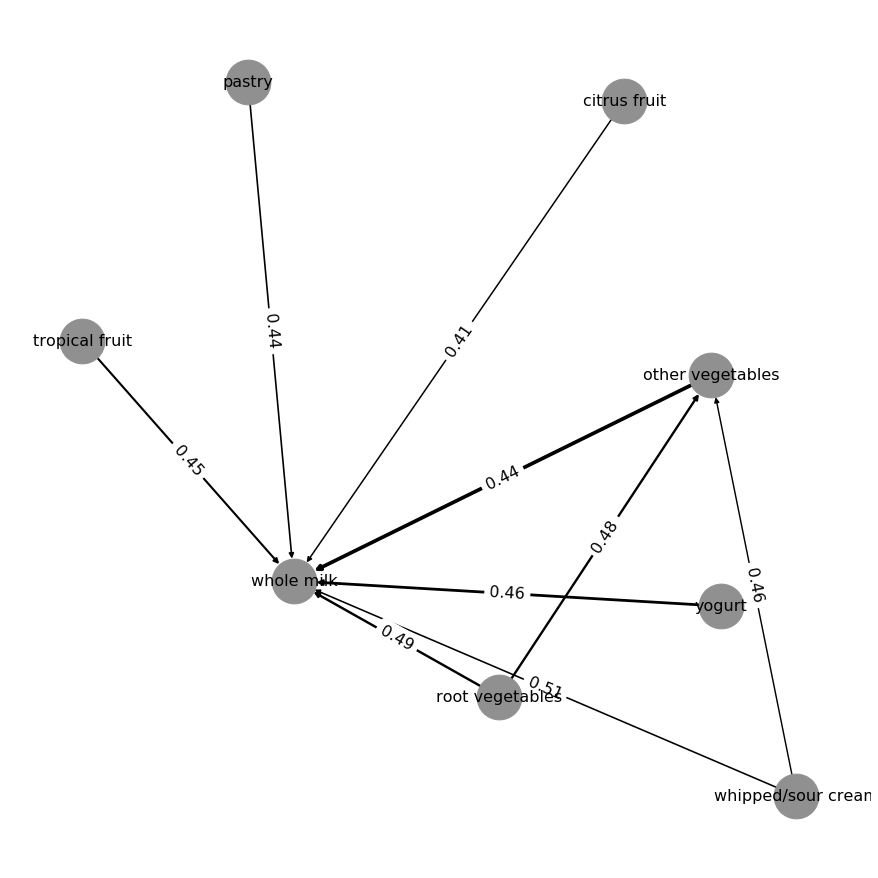

In [66]:
rules = association_rules(result, min_threshold = 0.4, metric='confidence')

digraph = nx.DiGraph()

for i in range(rules.shape[0]):
    digraph.add_edge(
        rules.iloc[i].antecedents,
        rules.iloc[i].consequents,
        weight=rules.iloc[i].support,
        label=round(rules.iloc[i].confidence,2)
    )

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(digraph)
nx.draw(
    digraph,
    pos,
    labels={node: ','.join(node) for node in digraph.nodes()},
    width=rules['support'] * 25,
    node_size=2000,
    node_color='#909090',
    font_size=16
)
nx.draw_networkx_edge_labels(
    digraph,
    pos,
    edge_labels=nx.get_edge_attributes(digraph, 'label'),
    font_size=16
)
plt.show()

На этом графике видно какие объекты входят в наибольшее количество правил, также можно увидеть, что самый частый консеквент это молоко.

Альтернативный способ:

In [69]:
rules_pivot = rules.pivot(index='antecedents', columns='consequents', values='confidence')
rules_pivot.index = list(map(lambda x: list(x)[0], rules_pivot.index))
rules_pivot.columns = list(map(lambda x: list(x)[0], rules_pivot.columns))
rules_pivot

,whole milk,other vegetables
yogurt,0.459933,NaN
tropical fruit,0.450704,NaN
other vegetables,0.442308,NaN
citrus fruit,0.412655,NaN
root vegetables,0.493333,0.477949
whipped/sour cream,0.513776,0.460292
pastry,0.437166,NaN
